In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import time
%load_ext autoreload
%autoreload 2

### Global variables

In [2]:
from global_variables import *
from data_preparation import * 
from cost import * 
from cross_validation import *
from performances import * 

method = methods[0]

# Load the data

We map the 'b' and 's' labels to 0 and 1 respectively.

In [3]:
X, Y = load_data()

In [4]:
print(X.shape, Y.shape)

(250000, 30) (250000,)


## Clean and standardize the features

### Counting the number of invalid datapoints per column

In [5]:
invalids = np.count_nonzero(X == -999, axis=0)
print(invalids)

[ 38114      0      0      0 177457 177457 177457      0      0      0
      0      0 177457      0      0      0      0      0      0      0
      0      0      0  99913  99913  99913 177457 177457 177457      0]


Therefore we get rid of columns [0,4,5,6,12,23,24,25,26,27,28]

In [6]:
X_standardized = clean_and_standardize_features(X)

## Methods from lab1 and lab2

We decided to use the sigmoid function: $$S(z) = \frac{1}{1 + e^{-z}}$$ <br />
to map the predicted values to probabilities of the event being a signal(1) rather than background(0) 

We use the cross-enthropy cost function for loss computation: 
$$J(\theta) = -\frac{1}{N} * (y^T log(Xw) + (1-y)^T log(1-Xw))$$

In [7]:
def grid_search(y, tx, w0, w1):
    losses = np.zeros((len(w0), len(w1)))
    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i][j] = compute_loss(y, tx, np.array([w0[i], w1[j]]))
    return losses

### Additional methods

We label the results <0.5 to -1, and the rest to 1

## Trying gradient descent

iter: 1000 loss: 0.08812854054945324
[ 3.42668000e-01 -1.30529070e-01 -1.30246208e-01  1.09075034e-03
  1.42045004e-01 -2.04334231e-02  1.16198254e-02 -9.67289464e-02
  6.65218764e-02  9.42774527e-02 -4.53873789e-04 -4.30971803e-04
  1.45339139e-01 -2.98119346e-04  1.15444953e-03  5.41900145e-02
  4.19753041e-04 -3.51690664e-02  4.18130538e-02 -3.78248752e-02]


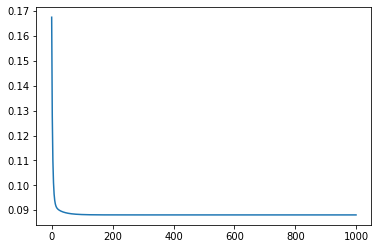

In [8]:
max_iters = 1000
gamma = 0.15
batch_size = 1

losses, w = gradient_descent(Y, X_standardized, np.ones(X_standardized.shape[1]), max_iters, gamma, method)
print(w)
plt.plot(losses)

In [9]:
Y_predicted = predict(X_standardized, w)
Y_labeled = label_results(Y_predicted)
print(performance(Y_labeled, label_results(Y)))
# 0.735 for mse
#0.74038 for cross-enthropy

0.419312


In [10]:
evaluate_performance(label_results(Y), Y_labeled)

In [11]:
find_best_threshold(Y_predicted, label_results(Y))

threshold is: 0.0
performance is: False
threshold is: 0.01
performance is: False
threshold is: 0.02
performance is: False
threshold is: 0.03
performance is: False
threshold is: 0.04
performance is: False
threshold is: 0.05
performance is: False
threshold is: 0.06
performance is: False
threshold is: 0.07
performance is: False
threshold is: 0.08
performance is: False
threshold is: 0.09
performance is: False
threshold is: 0.1
performance is: False
threshold is: 0.11
performance is: False
threshold is: 0.12
performance is: False
threshold is: 0.13
performance is: False
threshold is: 0.14
performance is: False
threshold is: 0.15
performance is: False
threshold is: 0.16
performance is: False
threshold is: 0.17
performance is: False
threshold is: 0.18
performance is: False
threshold is: 0.19
performance is: False
threshold is: 0.2
performance is: False
threshold is: 0.21
performance is: False
threshold is: 0.22
performance is: False
threshold is: 0.23
performance is: False
threshold is: 0.24


(0.51, True)

# Oversampling the signal class

In [12]:
all_data = np.column_stack([Y, X_standardized])
distrib = np.bincount(all_data[:,0].astype(int))
prob = 1/distrib[all_data[:, 0].astype(int)].astype(float)
prob /= prob.sum()
all_data = all_data[np.random.choice(np.arange(len(all_data)), size=np.count_nonzero(distrib)*distrib.max(), p=prob)]
print(all_data.shape)

(328666, 21)


### Rerunning the gradient descent with oversampled data

[ 4.60375827e-01 -1.41452515e-01 -1.63447572e-01  6.67669098e-03
  1.77993604e-01 -1.58936954e-02  1.48860198e-02 -1.26581313e-01
  7.43685689e-02  9.97462511e-02 -3.07667367e-04  2.00376535e-04
  1.81002652e-01  6.17498771e-04  1.11624359e-03  5.09506306e-02
 -4.23289846e-04 -4.27646438e-02  5.46838246e-02 -4.32483634e-02]
0.09403535512252727


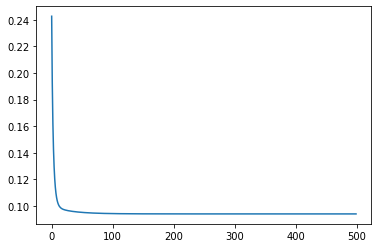

In [13]:
max_iters = 500
gamma = 0.15
batch_size = 1

losses, w = gradient_descent(all_data[:,0], all_data[:,1:], np.ones(X_standardized.shape[1]), max_iters, gamma, method)
print(w)
print(losses[-1])
plt.plot(losses)

In [14]:
Y_predicted = predict(X_standardized, w)
Y_labeled = label_results(Y_predicted)
print(performance(Y_labeled, label_results(Y)))
# 0.735 for mse
#0.74038 for cross-enthropy
evaluate_performance(label_results(Y), Y_labeled)

0.380856


## Load test data

In [15]:
test_data = np.genfromtxt(testing_data, delimiter=',', skip_header=1)
test_X = test_data[:, 2:]
test_X_standardized = clean_and_standardize_features(test_X)

In [16]:
test_predictions = label_results(predict(test_X_standardized, w))
test_ids = range(350000,918238)

In [17]:
test_results = np.column_stack([test_ids, test_predictions])
suffix = time.time()
np.savetxt('submission' + str(suffix) + '.csv', test_results, fmt="%d", delimiter=",", header="Id,Prediction", comments='')